# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
#Extra
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [3]:
# Import the data
file_path = Path("Resources/lending_data.csv")
lending_df = pd.read_csv(file_path)
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

For this module, I predicut Random Forest  to perform better because I expect a few individual investors to be outliers for this data. Since Random Forest handles outliers better than Logistic Regression, I based my prediction on that.

## Split the Data into Training and Testing Sets

In [4]:
#Create Data
y = lending_df[['loan_status']]
X = lending_df[['loan_size', 'interest_rate', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]
X_train, X_test, y_train, y_test = train_test_split(X,y)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

# Logistic Regression

In [5]:
# Train a Logistic Regression model and print the model score
classifier = LogisticRegression()
classifier

LogisticRegression()

In [6]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [7]:
#Logistic Regression: Model Score
print(f"Training Score: : {classifier.score(X_train, y_train)}")
print(f"Test Score: : {classifier.score(X_test, y_test)}")

Training Score: : 0.99193492915119
Test Score: : 0.9917457697069748


In [8]:
#Confusion Matrix
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18636,    90],
       [   70,   588]], dtype=int64)

In [9]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9917457697069748


In [10]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18726
           1       0.87      0.89      0.88       658

    accuracy                           0.99     19384
   macro avg       0.93      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



# Random Forest

In [11]:
#Create Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

In [13]:
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.68281143e-01 3.11504547e-01 1.88884656e-01 1.08351995e-01
 1.11781830e-04 2.22865877e-01]


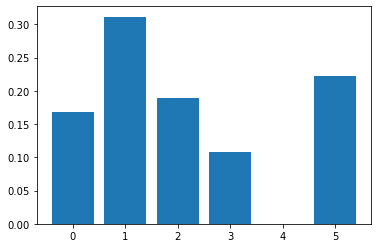

In [14]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [15]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()
sel.transform(X)

array([[1.07000000e+04, 7.67200000e+00, 4.31818182e-01, 2.28000000e+04],
       [8.40000000e+03, 6.69200000e+00, 3.11926606e-01, 1.36000000e+04],
       [9.00000000e+03, 6.96300000e+00, 3.49240781e-01, 1.61000000e+04],
       ...,
       [1.76000000e+04, 1.05950000e+01, 6.26400996e-01, 5.03000000e+04],
       [1.63000000e+04, 1.00680000e+01, 6.01593625e-01, 4.53000000e+04],
       [1.56000000e+04, 9.74200000e+00, 5.85062241e-01, 4.23000000e+04]])

In [16]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [17]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [18]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [19]:
rf2 = RandomForestClassifier(max_depth=1)
rf2.fit(X_selected_train_scaled,y_train)
print(f'Training Score: {rf2.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf2.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9946003576833127
Testing Score: 0.9938609162195625


*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

My prediction was that Random Forest Classifier would perform better for this module. However, both models performed well without significant difference.